In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Chapter06Exercise.csv")
df.head()

,Student_ID,First_Name,Last_Name,Gender,Grade,Tardies,Absences,Suspension,Expulsion,Arrest
0,309,Amanda,Freeman,0,12,5,7,1,1,1
1,290,Norma,Diaz,0,9,3,0,0,0,1
2,208,Doris,Gray,0,11,4,3,1,1,1
3,610,Antonio,Stephens,1,9,7,3,1,0,0
4,218,Carol,Hudson,0,11,2,0,0,0,0


In [3]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Gender', 'Grade', 'Tardies',
       'Absences', 'Suspension', 'Expulsion', 'Arrest'],
      dtype='object')

In [4]:
# these are non-feature columns so we'll drop them first
columns_to_drop = ["Student_ID", "First_Name", "Last_Name"]
nonfeature_dropped = df.drop(columns=columns_to_drop, axis=1)
nonfeature_dropped

,Gender,Grade,Tardies,Absences,Suspension,Expulsion,Arrest
0,0,12,5,7,1,1,1
1,0,9,3,0,0,0,1
2,0,11,4,3,1,1,1
3,1,9,7,3,1,0,0
4,0,11,2,0,0,0,0
...,...,...,...,...,...,...,...
938,0,11,5,3,0,0,1
939,0,10,2,0,0,0,0
940,1,10,2,0,0,0,0
941,1,9,2,0,0,0,0


In [6]:
# K-mean Clustering with k = 3
# I want to categrorize students into 3 groups
# 1.bad students
# 2.normal students
# 3.good students
# by their behavior ex.Tardies, Absences, blabla

k = 3
kmeans = KMeans(n_clusters=k)
cluster = kmeans.fit_predict(nonfeature_dropped)

#combines the clusters with the original DataFrame:
df['Cluster'] = cluster
df

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Student_ID,First_Name,Last_Name,Gender,Grade,Tardies,Absences,Suspension,Expulsion,Arrest,Cluster
0,309,Amanda,Freeman,0,12,5,7,1,1,1,2
1,290,Norma,Diaz,0,9,3,0,0,0,1,1
2,208,Doris,Gray,0,11,4,3,1,1,1,0
3,610,Antonio,Stephens,1,9,7,3,1,0,0,0
4,218,Carol,Hudson,0,11,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
938,808,Lois,Burton,0,11,5,3,0,0,1,0
939,595,Carol,Stanley,0,10,2,0,0,0,0,1
940,87,David,Cunningham,1,10,2,0,0,0,0,1
941,625,Joe,Fisher,1,9,2,0,0,0,0,1


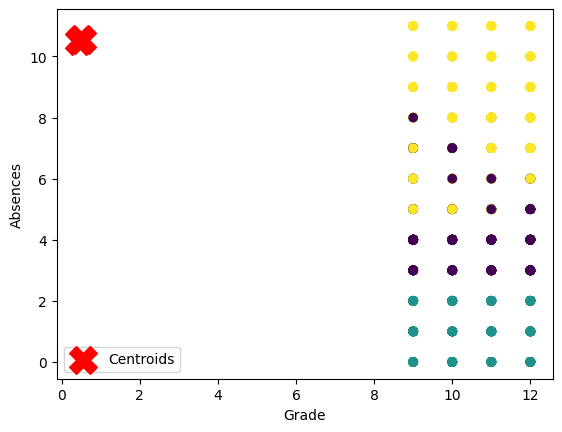

In [18]:

plt.scatter(df["Grade"], df["Tardies"], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroids')
plt.xlabel('Grade')
plt.ylabel('Absences')
plt.legend()
plt.show()

# it seems every grade has almost the same number of bad, normal and good students according to the chart

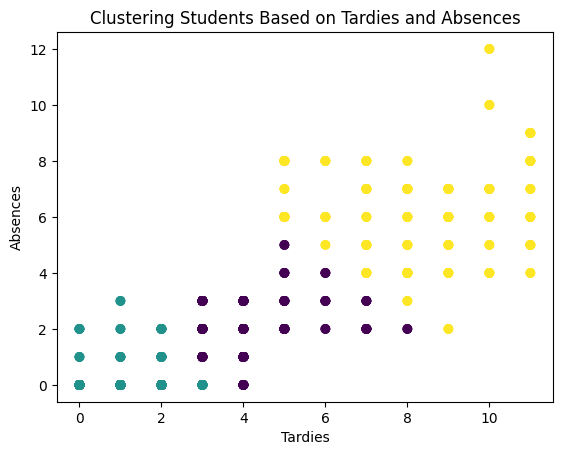

In [10]:

plt.scatter(df['Tardies'], df['Absences'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Tardies')
plt.ylabel('Absences')
plt.title('Clustering Students Based on Tardies and Absences')
plt.show()

# it seems there is a lot of bad student according to the chart (lots of yellow points which are many absences and tardies)

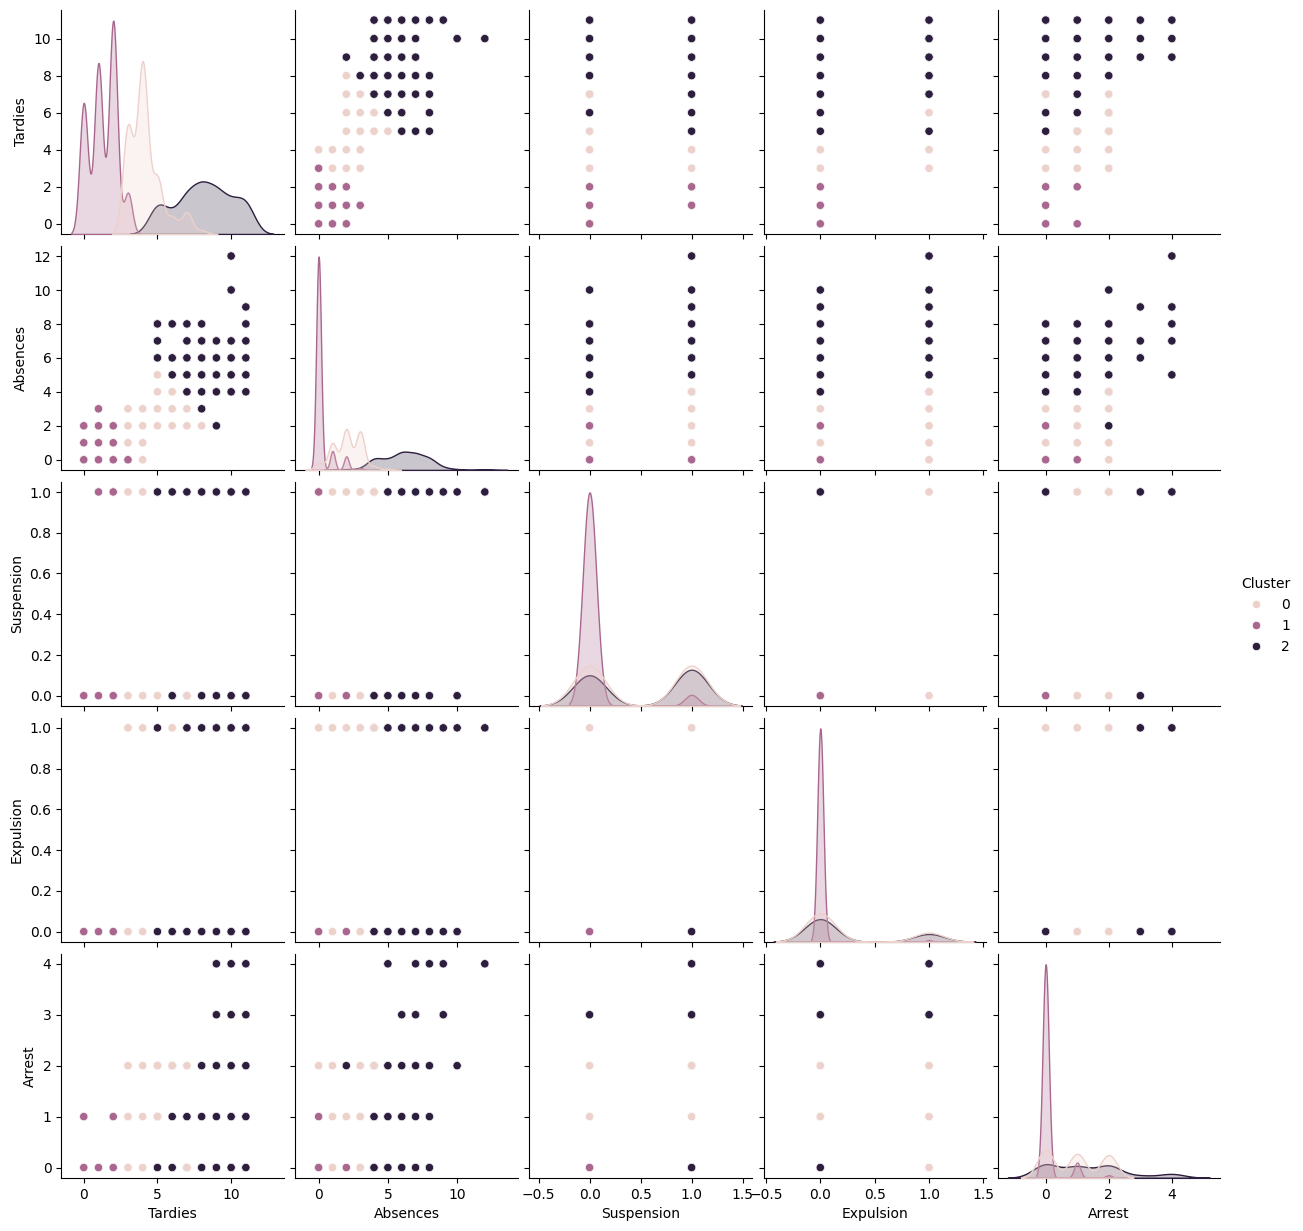

In [12]:
import seaborn as sns

# Create a pairwise scatter plot matrix
sns.pairplot(df, hue='Cluster', vars=['Tardies', 'Absences', 'Suspension', 'Expulsion', 'Arrest'])